### Load Data

In [2]:
import pandas as pd

pd.set_option('display.max_columns', 100)

df_train = pd.read_parquet('../../data/model_data/training_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_train

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days
0,2015-12-24 00:00:00+00:00,AAPL,24.194263,24.494490,54281600.0,0.970395,25.979742,24.720767,27.224792,24.798318,26.579572,26.436727,27.177436,25.869796,-1.781253,0.142845,-0.740709,1.307640,195440160.0,144712000.0,145997280.0,173605320.0,208087560.0,0,1
1,2015-12-24 00:00:00+00:00,AMGN,115.816658,126.452103,943000.0,4.877767,120.935859,113.872980,125.740771,124.367628,123.584390,122.481847,123.234310,119.349458,0.783237,1.102544,-0.752464,3.884852,3509140.0,2935060.0,3244410.0,3121370.0,3939210.0,0,1
2,2015-12-24 00:00:00+00:00,AXP,53.312790,61.423836,1956400.0,2.345914,63.849332,61.135779,67.412856,60.703300,62.062912,62.931396,64.562424,66.024479,-1.359612,-0.868484,-1.631028,-1.462054,6577980.0,5235460.0,4932520.0,6215000.0,7275040.0,0,1
3,2015-12-24 00:00:00+00:00,BA,120.255928,128.722504,1185000.0,4.418714,128.754730,122.425815,132.987834,128.988866,131.408534,131.562788,131.684204,127.417228,-2.419669,-0.154253,-0.121416,4.266976,4102880.0,3429540.0,2874360.0,2669230.0,4932430.0,0,0
4,2015-12-24 00:00:00+00:00,CAT,59.485294,55.321060,2322100.0,2.065715,55.659195,52.515944,57.955542,53.339613,55.278802,56.091318,58.437958,56.003994,-1.939189,-0.812516,-2.346640,2.433964,7296050.0,6032330.0,5290740.0,5432720.0,7550870.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44394,2021-12-21 00:00:00+00:00,UNH,488.018250,468.398438,2536000.0,27.170800,426.051384,383.526956,459.883533,463.707886,431.450851,432.848767,437.227090,410.159958,32.257034,-1.397916,-4.378323,27.067133,3417900.0,3903070.0,2705580.0,2573820.0,3015670.0,1,0
44395,2021-12-21 00:00:00+00:00,V,214.871170,210.870255,6993700.0,11.317951,210.150818,194.075429,225.456877,207.312334,194.272206,203.977161,209.624944,224.164865,13.040128,-9.704955,-5.647783,-14.539922,9693270.0,12887460.0,15701270.0,14682940.0,5657040.0,5,1
44396,2021-12-21 00:00:00+00:00,VZ,42.571808,43.704540,23905300.0,0.912338,43.193298,41.853022,44.396194,42.570941,42.306792,43.013951,43.586961,43.360075,0.264149,-0.707158,-0.573010,0.226886,28778580.0,24900230.0,16882250.0,17389750.0,24161160.0,1,3
44397,2021-12-21 00:00:00+00:00,WBA,40.626366,42.428848,5078500.0,1.179074,40.600002,39.355524,42.009136,41.799544,39.251775,41.091545,40.665156,40.923383,2.547769,-1.839770,0.426389,-0.258226,5562310.0,8344900.0,5002170.0,5909800.0,8406610.0,0,0


In [3]:
df_val = pd.read_parquet('../../data/model_data/validation_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_val

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days
0,2021-12-22 00:00:00+00:00,AAPL,163.101181,172.999390,92135300.0,11.536856,153.029274,140.236682,171.731744,171.892281,162.149005,151.795035,148.103979,144.599614,9.743275,10.353970,3.691055,3.504366,128444590.0,116093580.0,84592020.0,71701510.0,66891540.0,5,6
1,2021-12-22 00:00:00+00:00,AMGN,218.492462,203.076965,2677700.0,5.218531,191.342075,185.052022,198.564529,199.415660,187.507706,189.467018,192.239140,188.390123,11.907954,-1.959312,-2.772122,3.849017,3579900.0,3225800.0,3145420.0,2688290.0,2445590.0,0,0
2,2021-12-22 00:00:00+00:00,AXP,182.228027,156.182083,2877700.0,8.199672,164.471274,151.650526,173.980484,156.280113,153.607709,171.086015,168.759679,170.878394,2.672404,-17.478307,2.326337,-2.118715,4138520.0,5391110.0,3540760.0,3481220.0,3519750.0,2,0
3,2021-12-22 00:00:00+00:00,BA,185.899994,201.690002,8145300.0,11.258560,212.428667,197.209995,226.039000,197.405998,202.096004,220.476001,214.318001,215.536998,-4.690005,-18.379997,6.158000,-1.218997,9397070.0,12139870.0,11545270.0,9133360.0,8246570.0,0,2
4,2021-12-22 00:00:00+00:00,CAT,212.590210,191.174240,3558700.0,5.504143,189.442366,181.381209,195.831859,190.700450,188.298367,193.884641,194.229831,187.516127,2.402083,-5.586273,-0.345190,6.713704,2967640.0,3641390.0,2858950.0,3633320.0,3350670.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9505,2023-03-28 00:00:00+00:00,UNH,468.023315,461.790863,2369500.0,11.975280,471.633285,458.425516,482.764175,463.169647,459.118402,475.749646,472.217047,473.864548,4.051245,-16.631244,3.532599,-1.647501,3137500.0,3028520.0,2903870.0,4633510.0,3625060.0,0,6
9506,2023-03-28 00:00:00+00:00,V,227.329453,217.774078,6418400.0,5.473950,219.505715,213.837282,226.757654,217.163239,217.702910,220.344905,226.742751,221.501404,-0.539671,-2.641995,-6.397845,5.241347,9118590.0,5720870.0,4910960.0,5663890.0,6233260.0,0,2
9507,2023-03-28 00:00:00+00:00,VZ,32.022575,33.710144,13092600.0,1.460070,34.970790,32.860294,36.850775,33.176993,33.285220,34.970727,36.290746,35.770012,-0.108227,-1.685508,-1.320019,0.520735,20777890.0,22228810.0,15217090.0,17361500.0,25187890.0,1,1
9508,2023-03-28 00:00:00+00:00,WBA,28.699596,30.448385,12993600.0,1.214417,31.801151,29.937906,33.028210,29.789359,30.984066,32.504685,32.688788,32.190313,-1.194707,-1.520619,-0.184103,0.498475,9053070.0,6701570.0,5202430.0,7046790.0,5878740.0,0,0


In [4]:
df_test = pd.read_parquet('../../data/model_data/testing_data.parquet').sort_values(by=['Date', 'Ticker'], ignore_index=True)

df_test

,Date,Ticker,Adj Close in 60 Days,Adj Close,Volume,60 Day Price Std,60 Day Price Mean,60 Day Price 10th Percentile,60 Day Price 90th Percentile,Adj Close Mean 0 to 10 Day Lag,Adj Close Mean 10 to 20 Day Lag,Adj Close Mean 20 to 30 Day Lag,Adj Close Mean 30 to 40 Day Lag,Adj Close Mean 40 to 50 Day Lag,Adj Close Mean 0 to 10 Day Lag Difference,Adj Close Mean 10 to 20 Day Lag Difference,Adj Close Mean 20 to 30 Day Lag Difference,Adj Close Mean 30 to 40 Day Lag Difference,Volume Mean 0 to 10 Day Lag,Volume Mean 10 to 20 Day Lag,Volume Mean 20 to 30 Day Lag,Volume Mean 30 to 40 Day Lag,Volume Mean 40 to 50 Day Lag,Congressional Purchases Past 90 Calendar Days,Congressional Sales Past 90 Calendar Days
0,2023-03-29 00:00:00+00:00,AAPL,184.078201,159.515167,51305700.0,9.464019,145.772511,131.901427,156.437357,156.889819,149.859126,148.405562,150.452866,139.788239,7.030693,1.453564,-2.047304,10.664627,67489400.0,67164210.0,55765260.0,80502530.0,67672220.0,1,7
1,2023-03-29 00:00:00+00:00,AMGN,216.414352,229.941650,2744000.0,12.777248,233.263481,219.900874,254.844986,224.118468,220.767082,225.410187,230.312340,243.921693,3.351385,-4.643105,-4.902153,-13.609354,2750140.0,2465110.0,2361040.0,3135410.0,2250830.0,0,2
2,2023-03-29 00:00:00+00:00,AXP,163.895004,159.850540,3884800.0,10.797143,162.152218,146.979616,174.969821,157.491714,166.388585,171.652449,174.004427,155.438736,-8.896870,-5.263864,-2.351978,18.565691,4266190.0,3937080.0,2195730.0,3734880.0,5249240.0,0,3
3,2023-03-29 00:00:00+00:00,BA,205.580002,207.970001,3572200.0,5.591076,207.639834,200.235007,214.363007,201.880002,206.538000,206.543002,212.414998,210.445998,-4.657999,-0.005002,-5.871996,1.969000,5705810.0,6562150.0,4791350.0,6092800.0,6678990.0,0,1
4,2023-03-29 00:00:00+00:00,CAT,231.696915,216.878937,1857300.0,12.965979,235.397708,213.863074,248.489122,213.621873,232.627466,235.739633,241.057544,248.611346,-19.005592,-3.112167,-5.317911,-7.553802,3303000.0,3479330.0,2815430.0,3645020.0,3963010.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,2024-07-03 00:00:00+00:00,UNH,581.849976,488.159027,2239200.0,18.427638,489.701731,474.279044,512.867938,488.678171,491.051801,499.923950,509.058670,486.139514,-2.373630,-8.872150,-9.134720,22.919156,5933730.0,3452100.0,3867740.0,2913310.0,3079510.0,0,1
9536,2024-07-03 00:00:00+00:00,V,275.170013,268.451660,5017800.0,4.046228,272.651303,267.565256,277.995547,269.957657,273.140280,272.119324,278.085852,270.490982,-3.182623,1.020956,-5.966528,7.594870,12733170.0,6560590.0,5575850.0,10566510.0,5965770.0,1,2
9537,2024-07-03 00:00:00+00:00,VZ,44.200008,39.836033,6653900.0,0.713149,38.898097,38.073831,39.867035,39.697499,39.061982,38.853695,38.841101,38.171677,0.635518,0.208287,0.012594,0.669424,19543700.0,13718620.0,18323040.0,14234740.0,17835740.0,0,1
9538,2024-07-03 00:00:00+00:00,WBA,9.060000,10.841380,26845500.0,1.659137,15.978217,14.771623,17.460229,13.444287,15.364481,15.533450,17.143166,17.035427,-1.920194,-0.168969,-1.609716,0.107739,34387240.0,9924720.0,16974690.0,8874300.0,8472370.0,0,1


### Feature Setup

In [5]:
X_train = df_train.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])
y_train = df_train['Adj Close in 60 Days'] - df_train['Adj Close']

X_val = df_val.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])
y_val = df_val['Adj Close in 60 Days'] - df_val['Adj Close']

X_test = df_test.drop(columns=['Date', 'Ticker', 'Adj Close in 60 Days'])
y_test = df_test['Adj Close in 60 Days'] - df_test['Adj Close']

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((44399, 22), (9510, 22), (9540, 22), (44399,), (9510,), (9540,))

### Hyperparameter Tuning

In [6]:
try:
    import optuna
except ModuleNotFoundError:
    !pip install optuna
    import optuna

In [7]:
from sklearn.metrics import mean_pinball_loss
from lightgbm import LGBMRegressor
import numpy as np

def objective(trial):
    # model tuning
    params = {
        'random_state': 22,
        'objective': 'quantile',
        'metric': 'quantile',
        'alpha': 0.9,
        'verbosity': -1,
        'n_estimators': 500,
        'early_stopping_round': 25,
        # 'monotone_constraints': monotone_contraints,
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
        'max_depth': trial.suggest_int('max_depth', 1, 32),
        'num_leaves': trial.suggest_int('num_leaves', 2, 2**8),
        'feature_fraction': trial.suggest_float('feature_fraction', 1e-8, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
    }
    mod = LGBMRegressor(**params)

    # cross validation
    mod.fit(
        X_train,
        y_train,
        eval_set=(X_val, y_val),
    )

    return mean_pinball_loss(y_test, mod.predict(X_test), alpha=0.9)

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22, n_startup_trials=25, multivariate=True))
study.optimize(objective, n_trials=50, show_progress_bar=True)

study.best_params

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-11-01 06:28:07,915] A new study created in memory with name: no-name-ece17f1d-9114-4e2e-8a0b-b2128b1fc5d8


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-11-01 06:28:10,915] Trial 0 finished with value: 4.321611059914771 and parameters: {'lambda_l1': 2.084605381503821, 'lambda_l2': 4.816810622816848, 'max_depth': 14, 'num_leaves': 221, 'feature_fraction': 0.17116156190005774, 'min_child_samples': 34}. Best is trial 0 with value: 4.321611059914771.
[I 2024-11-01 06:28:12,777] Trial 1 finished with value: 4.01885592747632 and parameters: {'lambda_l1': 2.7053283402729833, 'lambda_l2': 6.910413507585547, 'max_depth': 8, 'num_leaves': 209, 'feature_fraction': 0.010526884210839693, 'min_child_samples': 57}. Best is trial 1 with value: 4.01885592747632.
[I 2024-11-01 06:28:14,219] Trial 2 finished with value: 3.807264536893099 and parameters: {'lambda_l1': 8.137261876014703, 'lambda_l2': 7.451002963137353, 'max_depth': 7, 'num_leaves': 3, 'feature_fraction': 0.7720438737240976, 'min_child_samples': 96}. Best is trial 2 with value: 3.807264536893099.
[I 2024-11-01 06:28:16,368] Trial 3 finished with value: 4.224176620613113 and paramete

{'lambda_l1': 3.8366537453572205,
 'lambda_l2': 0.39783890459968285,
 'max_depth': 2,
 'num_leaves': 122,
 'feature_fraction': 0.8857869073517547,
 'min_child_samples': 8}

### Evaluation

In [8]:
best_params = {
    'random_state': 22,
    'objective': 'quantile',
    'metric': 'quantile',
    'alpha': 0.9,
    'verbosity': -1,
    'n_estimators': 500,
    'early_stopping_round': 25,
}

best_params.update(**study.best_params)

mod = LGBMRegressor(**best_params)

mod.fit(
    X_train,
    y_train,
    eval_set=(X_val, y_val),
)

df_test['Prediction'] = mod.predict(X_test) + df_test['Adj Close']

mean_pinball_loss(df_test['Adj Close in 60 Days'], df_test['Prediction'], alpha=0.9)

3.795675695292591

In [9]:
# directional accuracy
((df_test['Adj Close in 60 Days'] >= df_test['Adj Close']) == (df_test['Prediction'] >= df_test['Adj Close'])).mean()

0.6077568134171908

In [10]:
(df_test['Adj Close in 60 Days'] - df_test['Prediction']).describe()

,0
count,9540.000000
mean,-18.419363
std,23.523637
min,-130.108225
25%,-30.494390
50%,-14.182608
75%,-4.503247
max,69.525411


In [11]:
(df_test['Adj Close in 60 Days'] - df_test['Prediction']).abs().describe()

,0
count,9540.000000
mean,22.326841
std,19.852704
min,0.000504
25%,7.391943
50%,16.712871
75%,31.682388
max,130.108225


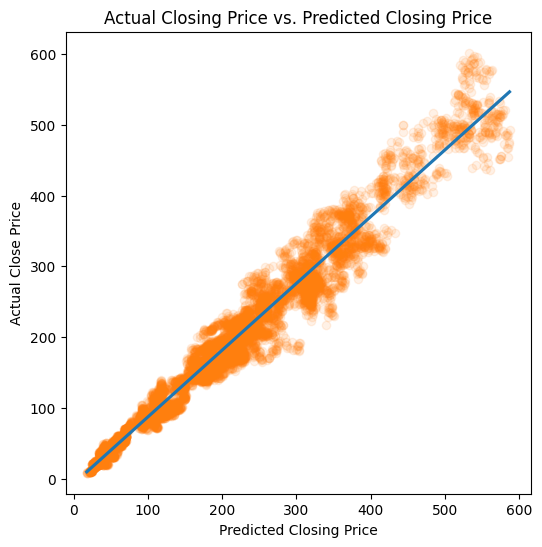

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test,
    x='Prediction',
    y='Adj Close in 60 Days',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[1]},
    line_kws={'color': sns.color_palette()[0]},
)

plt.title('Actual Closing Price vs. Predicted Closing Price')
plt.xlabel('Predicted Closing Price')
plt.ylabel('Actual Close Price')

plt.show()

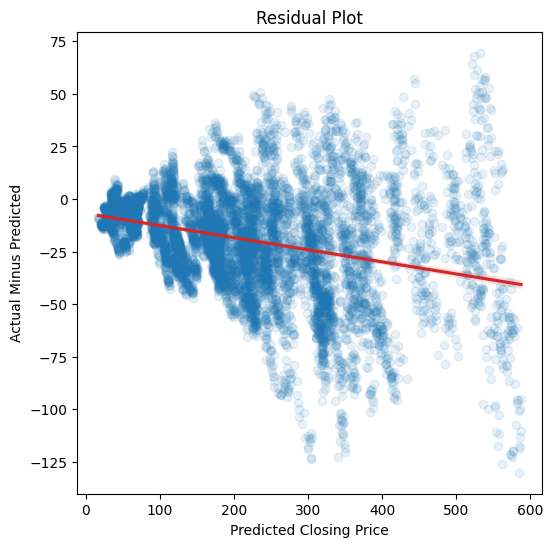

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test.assign(f=(df_test['Adj Close in 60 Days'] - df_test['Prediction'])),
    x='Prediction',
    y='f',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[0]},
    line_kws={'color': sns.color_palette()[3]},
)

plt.title('Residual Plot')
plt.xlabel('Predicted Closing Price')
plt.ylabel('Actual Minus Predicted')

plt.show()

In [14]:
(df_test['Prediction'] > df_test['Adj Close']).mean()

1.0

In [15]:
(df_test['Adj Close in 60 Days'] > df_test['Adj Close']).mean()

0.6075471698113207

In [16]:
df_test.loc[df_test['Prediction'] > df_test['Adj Close'], ['Adj Close', 'Adj Close in 60 Days']].diff(axis=1)['Adj Close in 60 Days'].sum()

69863.68284511566

In [17]:
df_test.loc[df_test['Prediction'] < df_test['Adj Close'], ['Adj Close', 'Adj Close in 60 Days']].diff(axis=1)['Adj Close in 60 Days'].sum()

0.0

In [18]:
(df_test['Adj Close in 60 Days'] - df_test['Adj Close']).describe()

,0
count,9540.000000
mean,7.323237
std,22.966286
min,-84.479126
25%,-5.314587
50%,3.486666
75%,17.079659
max,115.154510


In [24]:
(df_test['Prediction'] - df_test['Adj Close in 60 Days']).describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90])

,0
count,9540.000000
mean,18.419363
std,23.523637
min,-69.525411
10%,-4.781467
25%,4.503247
50%,14.182608
75%,30.494390
90%,49.711275
max,130.108225


In [25]:
(df_test['Prediction'] >= df_test['Adj Close in 60 Days']).mean()

0.8503144654088051

In [19]:
(df_test['Prediction'] - df_test['Adj Close']).describe()

,0
count,9540.000000
mean,25.742600
std,13.432526
min,5.107120
25%,13.544048
50%,24.079706
75%,39.687102
max,48.554628


In [20]:
try:
    import shap
except ModuleNotFoundError:
    !pip install shap
    import shap

In [21]:
explainer = shap.Explainer(mod, feature_names=X_train.columns, seed=22)

shap_values = explainer(X_test)

shap_values.shape

(9540, 22)

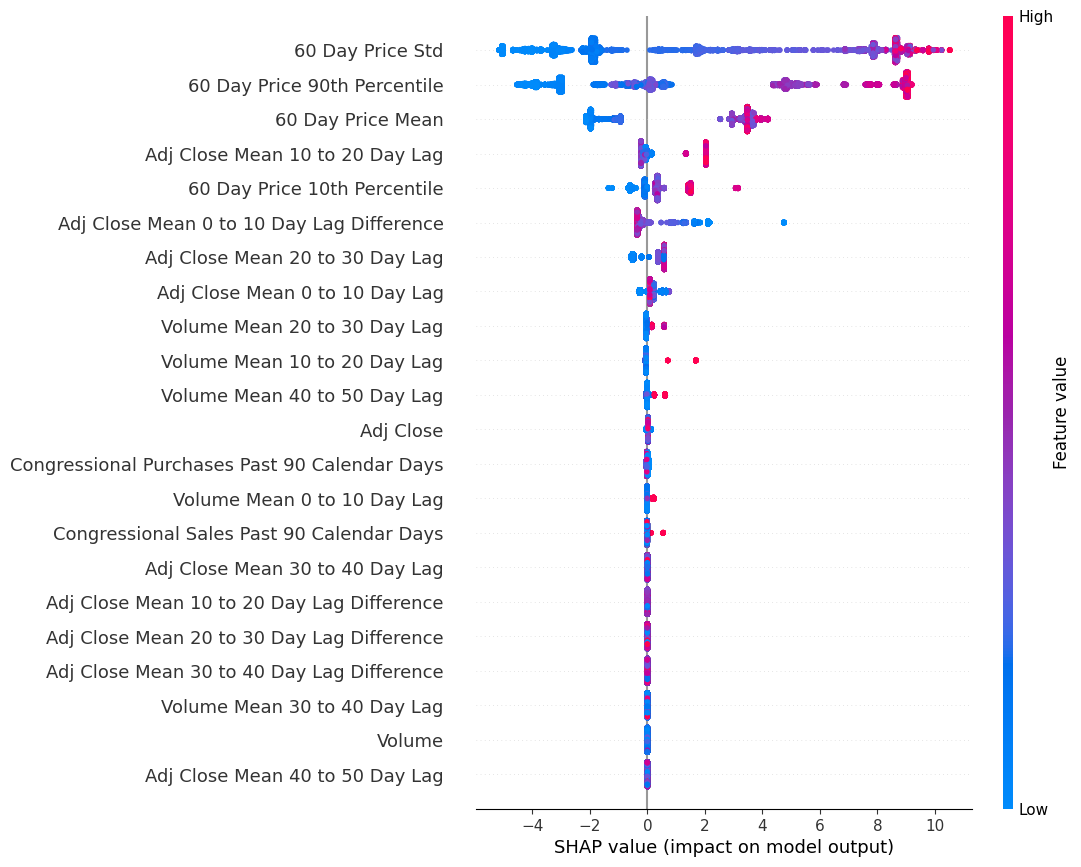

In [22]:
shap.plots.beeswarm(shap_values, max_display=None)